In [84]:
import pandas as pd

In [85]:
#Load the dataset into DataFrame

df = pd.read_csv("../data/King_County_House_prices_dataset.csv")
df.shape

(21597, 21)

In [86]:
# Check the Missing (NaN) values, and filled them by 0
df.fillna(0, inplace=True)
df.shape

(21597, 21)

In [87]:
import matplotlib.pyplot as plt 
import seaborn as sns

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

<Figure size 1296x720 with 0 Axes>

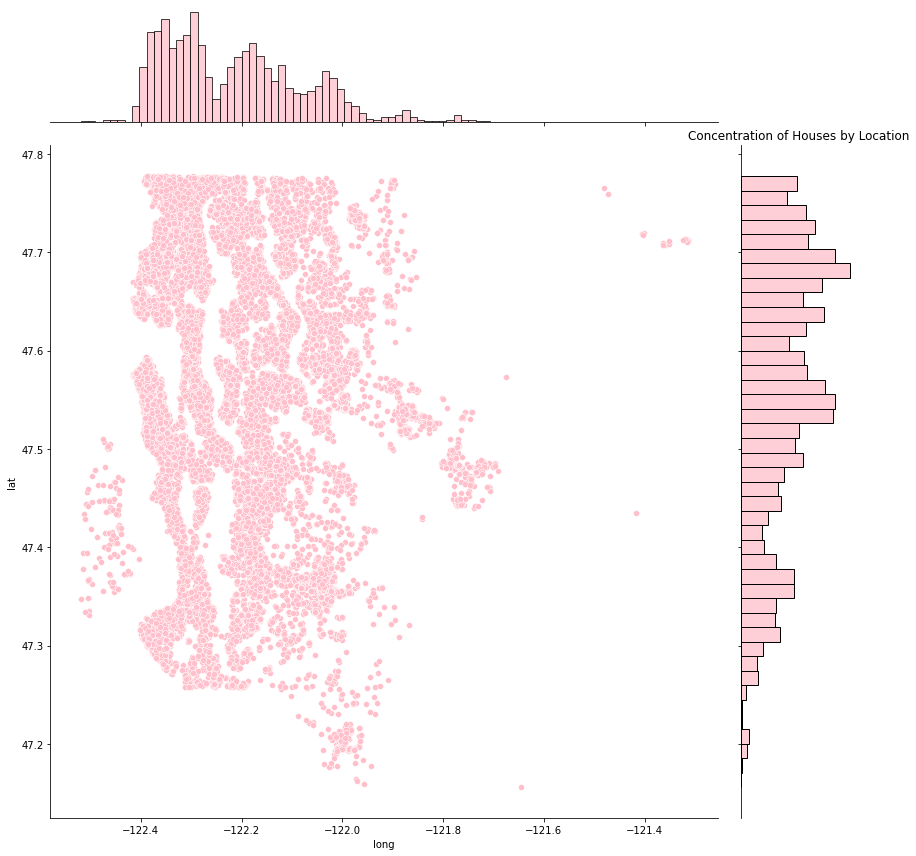

In [88]:
# Show the location of houses in the map, where are they mostly concentrated

plt.figure(figsize=(18,10))

sns.jointplot(x=df.long, y=df.lat, size=12, color= "pink")
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longtitude', fontsize=12)
plt.title("Concentration of Houses by Location")
sns.despine

In [89]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [91]:
#get the houses data, only on the city center, in King County, the city center is in Seattle.

#the Zipcode in Seattle: [98101 98102 98103 98104 98105 98106 98107 98108 98109 98111 98112 98113 98114 98115 98116 98117 98118 98119 98121 98122 98124 98125 98126 98127 98129 98131 98133 98134 98136 98138 98139 98141 98144 98145 98146 98148 98154 98155 98158 98160 98161 98164 98165 98166 98168 98170 98174 98175 98177 98178 98181 98185 98188 98190 98191 98194 98195 98198 98199] source: https://worldpostalcode.com/united-states/washington/seattle#


seattle = list(range(98101, 98200))
seattle

df1 = df.query("zipcode in @seattle")
#df1 = df.query("long <= -122 and lat >= 47.5 and lat <= 47.6")
#df1.shape
#df.lat.unique()
#df1.shape
df1.zipcode.unique()

df1.shape

(8973, 21)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

<Figure size 1296x720 with 0 Axes>

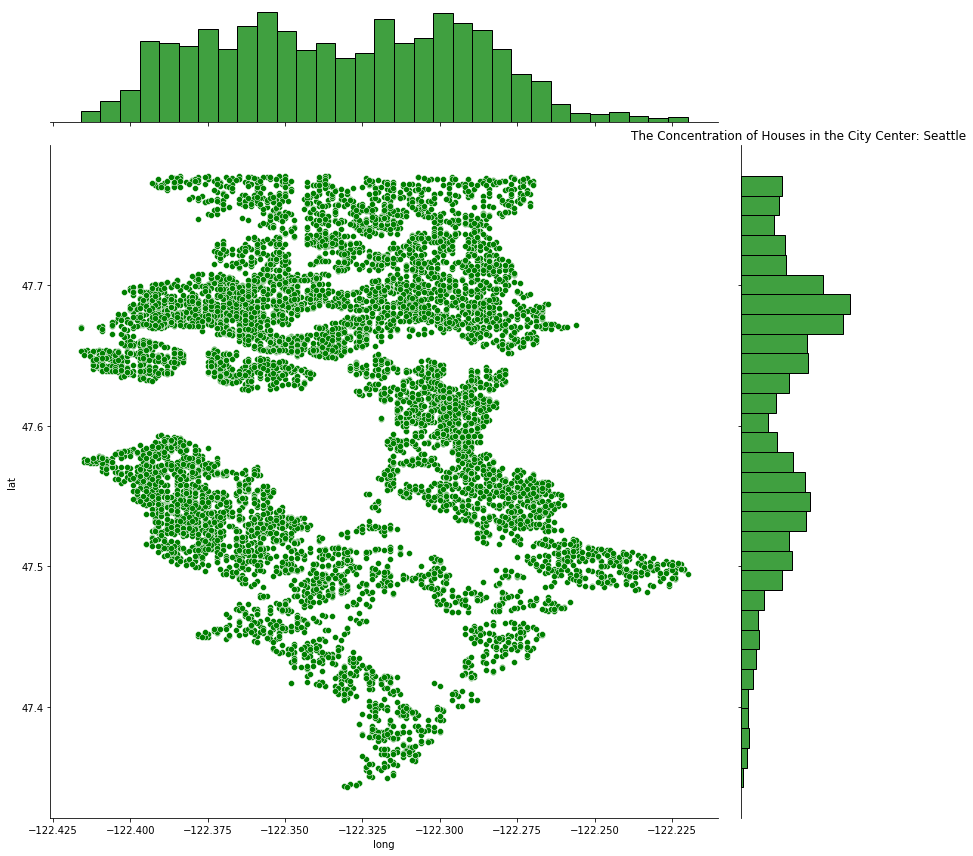

In [30]:
# show the location of houses in the map

plt.figure(figsize=(18,10))

sns.jointplot(x=df1.long, y=df1.lat, size=12, color= "green")
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longtitude', fontsize=12)
plt.title("The Concentration of Houses in the City Center: Seattle")
sns.despine

<Figure size 1296x720 with 0 Axes>

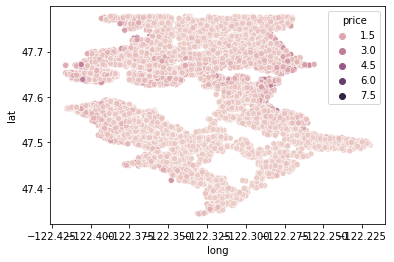

<Figure size 1296x720 with 0 Axes>

In [92]:
sns.scatterplot(data=df1, x="long", y="lat", hue ="price")
plt.figure(figsize=(18,10))

In [35]:
#get the prices of the houses, that are in the middle ranged
# assuming the middle range of prices are between quantile 30% and 70% (exactly 20% below and above the median price)

df2 = df1.query("price >= price.quantile(0.3) and price <= price.quantile(0.7)")

df2.shape

(3614, 21)

In [36]:
df2

id       date     price  bedrooms  bathrooms  sqft_living  \
1      6414100192  12/9/2014  538000.0         3       2.25         2570   
11     9212900260  5/27/2014  468000.0         2       1.00         1160   
14     1175000570  3/12/2015  530000.0         5       2.00         1810   
17     6865200140  5/29/2014  485000.0         4       1.00         1600   
20     6300500875  5/14/2014  385000.0         4       1.75         1620   
...           ...        ...       ...       ...        ...          ...   
21588  9834201367  1/26/2015  429000.0         3       2.00         1490   
21591  2997800021  2/19/2015  475000.0         3       2.50         1310   
21592   263000018  5/21/2014  360000.0         3       2.50         1530   
21593  6600060120  2/23/2015  400000.0         4       2.50         2310   
21594  1523300141  6/23/2014  402101.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1          7242     2.0         0.0   0.0  ...      7        2170   
11         6000     1.0         0.0   0.0  ...      7         860   
14         4850     1.5         0.0   0.0  ...      7        1810   
17         4300     1.5         0.0   0.0  ...      7        1600   
20         4980     1.0         0.0   0.0  ...      7         860   
...         ...     ...         ...   ...  ...    ...         ...   
21588      1126     3.0         0.0   0.0  ...      8        1490   
21591      1294     2.0         0.0   0.0  ...      8        1180   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
1              400.0     1951        1991.0    98125  47.7210 -122.319   
11             300.0     1942           0.0    98115  47.6900 -122.292   
14               0.0     1900           0.0    98107  47.6700 -122.394   
17               0.0     1916           0.0    98103  47.6648 -122.343   
20             760.0     1947           0.0    98133  47.7025 -122.341   
...              ...      ...           ...      ...      ...      ...   
21588            0.0     2014           0.0    98144  47.5699 -122.288   
21591          130.0     2008           0.0    98116  47.5773 -122.409   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   

       sqft_living15  sqft_lot15  
1               1690        7639  
11              1330        6000  
14              1360        4850  
17              1610        4300  
20              1400        4980  
...              ...         ...  
21588           1400        1230  
21591           1330        1265  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  

[3614 rows x 21 columns]

In [37]:
# change date integer into datetime format

df2["date"] = pd.to_datetime(df2["date"])

In [80]:
#create month column
df2["month"] = df2['date'].dt.month

# EDA 

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

%matplotlib inline

In [61]:
# "formula notation" 
import statsmodels.formula.api as smf
# Define the model, fit the model, and generate the summary
model = smf.ols(formula='price ~ grade', data=df2).fit()
model.params

Intercept    327259.039703
grade         18751.483935
dtype: float64

In [71]:
import statsmodels.api as sms

# Prepare data for modeling
# Choose the predictor and add a constant term
X = df2[['grade']]
y = df2.price
# Our model needs an intercept so we add a column of 1s:
X = sms.add_constant(X)
display(X.head())
display(y.head())

# Create an OLS model
model = sms.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
print(results.summary())

#get slope and intercept
intercept, slope = results.params
print(intercept)
print(slope)

const  grade
1     1.0      7
11    1.0      7
14    1.0      7
17    1.0      7
20    1.0      7

1     538000.0
11    468000.0
14    530000.0
17    485000.0
20    385000.0
Name: price, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     152.4
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.55e-34
Time:                        15:45:30   Log-Likelihood:                -45078.
No. Observations:                3614   AIC:                         9.016e+04
Df Residuals:                    3612   BIC:                         9.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.273e+05    1.1e+04     29.681      0.0

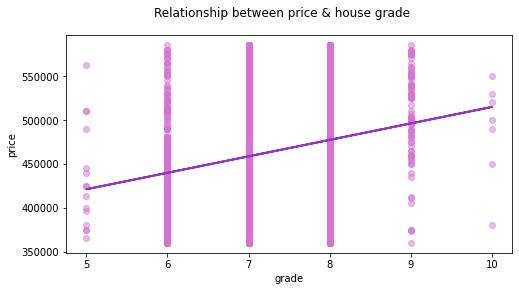

In [70]:
# Plotting the results of our model
fig, ax = plt.subplots(figsize=(8, 4))
x = df2[['grade']]
# add data points
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between price & house grade')
# plotting regression line
ax.plot(x, x*slope +intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("price");
ax.set_xlabel("grade");

In [82]:
import statsmodels.api as sms

# Prepare data for modeling
# Choose the predictor and add a constant term
X = df2[['month']]
y = df2.price
# Our model needs an intercept so we add a column of 1s:
X = sms.add_constant(X)
display(X.head())
display(y.head())

# Create an OLS model
model = sms.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
print(results.summary())

#get slope and intercept
intercept, slope = results.params
print(intercept)
print(slope)

const  month
1     1.0     12
11    1.0      5
14    1.0      3
17    1.0      5
20    1.0      5

1     538000.0
11    468000.0
14    530000.0
17    485000.0
20    385000.0
Name: price, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1934
Date:                Wed, 17 Feb 2021   Prob (F-statistic):              0.660
Time:                        15:54:51   Log-Likelihood:                -45153.
No. Observations:                3614   AIC:                         9.031e+04
Df Residuals:                    3612   BIC:                         9.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.638e+05   2530.420    183.270      0.0

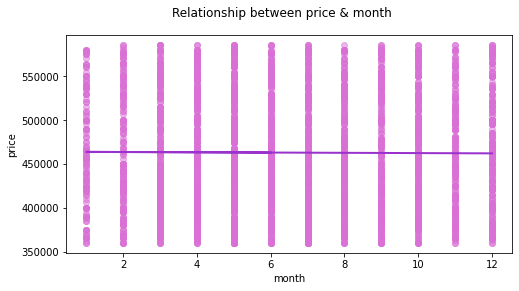

In [83]:
# Plotting the results of our model
fig, ax = plt.subplots(figsize=(8, 4))
x = df2[['month']]
# add data points
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between price & month')
# plotting regression line
ax.plot(x, x*slope +intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("price");
ax.set_xlabel("month");

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

features = df[["price", "bedrooms", "bathrooms", "floors", "view", "sqft_living", "grade", "sqft_above", "sqft_living15"]]
response = df["price"]


fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=("bedrooms", "bathrooms", "floors", "view", "sqft_living", "grade", "sqft_above", "sqft_living15" ))

fig.add_trace(go.Scatter(x= features["bedrooms"], y=response, mode = "markers", name ="bedrooms"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=features["bathrooms"], y=response, mode = "markers", name= "Bathrooms"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=features["floors"], y=response, mode = "markers", name= "floors"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=features["view"], y=response, mode = "markers", name= "view"),
              row=2, col=2)

fig.add_trace(go.Scatter(x=features["sqft_living"], y=response, mode = "markers", name = "sqft_living"),
              row=3, col=1)

fig.add_trace(go.Scatter(x=features["grade"], y=response, mode = "markers", name = "grade"),
              row=3, col=2)

fig.add_trace(go.Scatter(x=features["sqft_above"], y=response, mode = "markers", name= "sqft_above"),
              row=4, col=1)

fig.add_trace(go.Scatter(x=features["sqft_living15"], y=response, mode = "markers", name= "sqft_living15"),
              row=4, col=2)


fig.update_layout(height=800, width=800, #ideally height= 1000, and width=800, it takes the notebook slower
                  title_text="House Features Correspond to the Price")

fig.show()